# IBM Quantum Computing Workshop (19 May 2020)

In [1]:
%matplotlib inline

# Importing standard Qiskit libraries and configuration account
from qiskit import QuantumCircuit, execute, Aer, IBMQ
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import *

# Loading IBM Q account
provider = IBMQ.load_account()
%qiskit_job_watcher

Accordion(children=(VBox(layout=Layout(max_width='710px', min_width='710px')),), layout=Layout(max_height='500…

<IPython.core.display.Javascript object>

# Example : Add 1 + 1

In [2]:
# Import the register classes
from qiskit import QuantumRegister, ClassicalRegister

def Adder(input1, input2):
    q = QuantumRegister(2)    # Two qubits to encode and manipulate the inputs
    c = ClassicalRegister(1)  # One bit to store the output
    qc = QuantumCircuit(q, c) # Quantum program
    
    if (input1):
        qc.x(0)
    if (input2):
        qc.x(1)
    
    # Entanglement
    qc.cx(0, 1)
    # Measurements
    qc.measure(q[1], c[0])
    
    # Run program on a Qasm Simulator
    backend = Aer.get_backend('qasm_simulator')
    
    # Since output will be deterministic, we can just use a single shot to get it
    job = execute(qc, backend, shots=1, memory=True)
    output = job.result().get_memory()[0]
    return output

In [3]:
output = Adder(1,1)

# 1 + 1 = 10 with one bit overflow
print("The output of Adder :", output)

The output of Adder : 0


In [4]:
qc = QuantumCircuit(2, 2)
qc.draw()

q_0: 
     
q_1: 
     
c_0: 
     
c_1:

In [5]:
qc = QuantumCircuit(QuantumRegister(2, 'my_QR'), ClassicalRegister(2, 'my_CR'))
qc.draw()

my_QR_0: 
         
my_QR_1: 
         
my_CR_0: 
         
my_CR_1:

In [6]:
# Create the quantum and classical registers with individual defined labels
qr1 = QuantumRegister(2, name='qr1')
cr1 = ClassicalRegister(2, name='cr1')

# Create the quantum circult using the registers
qc1 = QuantumCircuit(qr1, cr1)

# Draw the circuit
qc1.draw()

qr1_0: 
       
qr1_1: 
       
cr1_0: 
       
cr1_1:

In [7]:
qr2 = QuantumRegister(4, name='qr2')
cr2 = ClassicalRegister(2, name='cr2')

# Create the quantum circult using the registers
qc2 = QuantumCircuit(qr2, cr1)

# Draw the circuit
qc2.draw()

qr2_0: 
       
qr2_1: 
       
qr2_2: 
       
qr2_3: 
       
cr1_0: 
       
cr1_1:

In [8]:
qc_combined = qc1 + qc2
qc_combined.draw()

qr1_0: 
       
qr1_1: 
       
qr2_0: 
       
qr2_1: 
       
qr2_2: 
       
qr2_3: 
       
cr1_0: 
       
cr1_1:

In [9]:
from qiskit.circuit.random import random_circuit
qc = random_circuit(3, 2, measure=True)
qc.draw()

┌────────────┐                   ┌─┐   
q_0: ──■──┤ U1(2.2113) ├───────────────────┤M├───
       │  ├────────────┤┌─────────────────┐└╥┘┌─┐
q_1: ──┼──┤ RX(3.3081) ├┤ U2(2.1226,5.62) ├─╫─┤M├
     ┌─┴─┐└───┬───┬────┘└───────┬─┬───────┘ ║ └╥┘
q_2: ┤ Y ├────┤ S ├─────────────┤M├─────────╫──╫─
     └───┘    └───┘             └╥┘         ║  ║ 
c_0: ════════════════════════════╬══════════╩══╬═
                                 ║             ║ 
c_1: ════════════════════════════╬═════════════╩═
                                 ║               
c_2: ════════════════════════════╩═══════════════

In [10]:
qc1 = random_circuit(2, 2)
qc2 = random_circuit(2, 3)
qc1.draw()

┌─────┐             
q_0: ┤ SDG ├─■───────────
     └┬───┬┘ │zz(5.8487) 
q_1: ─┤ S ├──■───────────
      └───┘

In [11]:
qc2.draw()

┌────────────┐   ┌─────┐         ┌───┐     
q_0: ┤ U1(3.1649) ├───┤ TDG ├─────────┤ Y ├─────
     └──┬─────┬───┘┌──┴─────┴───┐┌────┴───┴────┐
q_1: ───┤ TDG ├────┤ RX(5.9396) ├┤ RY(0.40926) ├
        └─────┘    └────────────┘└─────────────┘

In [12]:
qc_combined = qc1 + qc2
qc_combined.draw()

┌─────┐             ┌────────────┐   ┌─────┐         ┌───┐     
q_0: ┤ SDG ├─■───────────┤ U1(3.1649) ├───┤ TDG ├─────────┤ Y ├─────
     └┬───┬┘ │zz(5.8487) └──┬─────┬───┘┌──┴─────┴───┐┌────┴───┴────┐
q_1: ─┤ S ├──■──────────────┤ TDG ├────┤ RX(5.9396) ├┤ RY(0.40926) ├
      └───┘                 └─────┘    └────────────┘└─────────────┘

In [13]:
qc_combined_inversed = qc2 + qc1
qc_combined_inversed.draw()

┌────────────┐   ┌─────┐         ┌───┐     ┌─────┐             
q_0: ┤ U1(3.1649) ├───┤ TDG ├─────────┤ Y ├─────┤ SDG ├─■───────────
     └──┬─────┬───┘┌──┴─────┴───┐┌────┴───┴────┐└┬───┬┘ │zz(5.8487) 
q_1: ───┤ TDG ├────┤ RX(5.9396) ├┤ RY(0.40926) ├─┤ S ├──■───────────
        └─────┘    └────────────┘└─────────────┘ └───┘

In [14]:
print("Width of the inversed combined Quantum Circuits :", qc_combined_inversed.width())
print("Depth of the inversed combined Quantum Circuits :", qc_combined_inversed.depth())

Width of the inversed combined Quantum Circuits : 2
Depth of the inversed combined Quantum Circuits : 5


In [15]:
print("Counts of the operators in the inversed combined Quantum Circuits :\n", qc_combined_inversed.count_ops())

Counts of the operators in the inversed combined Quantum Circuits :
 OrderedDict([('tdg', 2), ('u1', 1), ('rx', 1), ('y', 1), ('ry', 1), ('s', 1), ('sdg', 1), ('rzz', 1)])


In [16]:
print("Size of the inversed combined Quantum Circuits :", qc_combined_inversed.size())

qc_combined_inversed.measure_all()
qc_combined_inversed.draw()

Size of the inversed combined Quantum Circuits : 9


┌────────────┐   ┌─────┐         ┌───┐     ┌─────┐              ░ ┌─┐»
   q_0: ┤ U1(3.1649) ├───┤ TDG ├─────────┤ Y ├─────┤ SDG ├─■────────────░─┤M├»
        └──┬─────┬───┘┌──┴─────┴───┐┌────┴───┴────┐└┬───┬┘ │zz(5.8487)  ░ └╥┘»
   q_1: ───┤ TDG ├────┤ RX(5.9396) ├┤ RY(0.40926) ├─┤ S ├──■────────────░──╫─»
           └─────┘    └────────────┘└─────────────┘ └───┘               ░  ║ »
meas_0: ═══════════════════════════════════════════════════════════════════╩═»
                                                                             »
meas_1: ═════════════════════════════════════════════════════════════════════»
                                                                             »
«           
«   q_0: ───
«        ┌─┐
«   q_1: ┤M├
«        └╥┘
«meas_0: ═╬═
«         ║ 
«meas_1: ═╩═
«

In [17]:
backend = provider.get_backend('ibmq_rome')
backend

<IBMQBackend('ibmq_rome') from IBMQ(hub='ibm-q', group='open', project='main')>

# Exploring decomposition of Quantum Circuits

In [18]:
import numpy as np

qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0,1)

qc.z(0)
qc.s(0)
qc.draw()

┌───┐     ┌───┐┌───┐
q_0: ┤ H ├──■──┤ Z ├┤ S ├
     └───┘┌─┴─┐└───┘└───┘
q_1: ─────┤ X ├──────────
          └───┘

In [19]:
qc.decompose().draw()

┌──────────┐     ┌────────┐┌──────────┐
q_0: ┤ U2(0,pi) ├──■──┤ U1(pi) ├┤ U1(pi/2) ├
     └──────────┘┌─┴─┐└────────┘└──────────┘
q_1: ────────────┤ X ├──────────────────────
                 └───┘

In [20]:
qc = QuantumCircuit(3)
qc.ccx(0,1,2)
qc.draw()

q_0: ──■──
       │  
q_1: ──■──
     ┌─┴─┐
q_2: ┤ X ├
     └───┘

In [21]:
qc.decompose().draw()

┌───┐      
q_0: ───────────────────■─────────────────────■────■───┤ T ├───■──
                        │             ┌───┐   │  ┌─┴─┐┌┴───┴┐┌─┴─┐
q_1: ───────■───────────┼─────────■───┤ T ├───┼──┤ X ├┤ TDG ├┤ X ├
     ┌───┐┌─┴─┐┌─────┐┌─┴─┐┌───┐┌─┴─┐┌┴───┴┐┌─┴─┐├───┤└┬───┬┘└───┘
q_2: ┤ H ├┤ X ├┤ TDG ├┤ X ├┤ T ├┤ X ├┤ TDG ├┤ X ├┤ T ├─┤ H ├──────
     └───┘└───┘└─────┘└───┘└───┘└───┘└─────┘└───┘└───┘ └───┘

In [22]:
qc.count_ops()

OrderedDict([('ccx', 1)])

In [23]:
qc.decompose().count_ops()

OrderedDict([('cx', 6), ('t', 4), ('tdg', 3), ('h', 2)])

In [24]:
print("Width of the Quantum Circuit :", qc.width())
print("Depth of the Quantum Circuit :", qc.depth())
print("Size of the Quantum Circuit :", qc.size())

Width of the Quantum Circuit : 3
Depth of the Quantum Circuit : 1
Size of the Quantum Circuit : 1


In [25]:
print("Width of the decomposed Quantum Circuit :", qc.decompose().width())
print("Depth of the decomposed Quantum Circuit :", qc.decompose().depth())
print("Size of the decomposed Quantum Circuit :", qc.decompose().size())

Width of the decomposed Quantum Circuit : 3
Depth of the decomposed Quantum Circuit : 11
Size of the decomposed Quantum Circuit : 15


In [26]:
# Create a 2-qubits circuit to generate the required composite gate
qr3 = QuantumRegister(3, 'qr3')

# Create a quantum circuit using the quantum register
qc = QuantumCircuit(qr3)

# Add any arbitrary gates to represent the function of the composite gate
qc.h(0)
qc.cx(0,1)
qc.cx(0,2)

# Draw the quantum circuit
qc.draw()

┌───┐          
qr3_0: ┤ H ├──■────■──
       └───┘┌─┴─┐  │  
qr3_1: ─────┤ X ├──┼──
            └───┘┌─┴─┐
qr3_2: ──────────┤ X ├
                 └───┘

In [27]:
# Create the quantum register
qr = QuantumRegister(2, name='qr_comp')

# Generate quantum circuit to make up the composite gate
comp_qc = QuantumCircuit(qr, name='comp_gate')

# Add any arbitrary gates to represent the function of the composite gate
comp_qc.h(0)
comp_qc.cx(0,1)

# Create the composite instructions by converting the Quantum Circuit to a list of instructions
comp_instructions = comp_qc.to_instruction()

# Assemble the composite
assembled_instructions = comp_instructions.assemble()

# Show the assembled instructions
print("The assembled instructions are :\n", assembled_instructions)

# Draw the quantum circuit which will represent the composite gate
comp_qc.draw()

The assembled instructions are :
 Instruction: comp_gate
		qubits: [0, 1]



┌───┐     
qr_comp_0: ┤ H ├──■──
           └───┘┌─┴─┐
qr_comp_1: ─────┤ X ├
                └───┘

In [28]:
# Append the composite gate with (0, 1)
qc.append(comp_qc, [qr3[0], qr3[1]])
qc.draw()

┌───┐          ┌────────────┐
qr3_0: ┤ H ├──■────■──┤0           ├
       └───┘┌─┴─┐  │  │  comp_gate │
qr3_1: ─────┤ X ├──┼──┤1           ├
            └───┘┌─┴─┐└────────────┘
qr3_2: ──────────┤ X ├──────────────
                 └───┘

In [29]:
# Append the composite gate with (1, 2)
qc.append(comp_qc, [qr3[1], qr3[2]])
qc.draw()

┌───┐          ┌────────────┐              
qr3_0: ┤ H ├──■────■──┤0           ├──────────────
       └───┘┌─┴─┐  │  │  comp_gate │┌────────────┐
qr3_1: ─────┤ X ├──┼──┤1           ├┤0           ├
            └───┘┌─┴─┐└────────────┘│  comp_gate │
qr3_2: ──────────┤ X ├──────────────┤1           ├
                 └───┘              └────────────┘

In [30]:
# Append the composite gate with (0, 2)
qc.append(comp_qc, [qr3[0], qr3[2]])
qc.draw()

┌───┐          ┌────────────┐              ┌────────────┐
qr3_0: ┤ H ├──■────■──┤0           ├──────────────┤0           ├
       └───┘┌─┴─┐  │  │  comp_gate │┌────────────┐│            │
qr3_1: ─────┤ X ├──┼──┤1           ├┤0           ├┤  comp_gate ├
            └───┘┌─┴─┐└────────────┘│  comp_gate ││            │
qr3_2: ──────────┤ X ├──────────────┤1           ├┤1           ├
                 └───┘              └────────────┘└────────────┘

In [31]:
# Append the composite gate with (0, 1)
qc.append(comp_qc, [qr3[0], qr3[1]])
qc.draw()

┌───┐          ┌────────────┐              ┌────────────┐┌────────────┐
qr3_0: ┤ H ├──■────■──┤0           ├──────────────┤0           ├┤0           ├
       └───┘┌─┴─┐  │  │  comp_gate │┌────────────┐│            ││  comp_gate │
qr3_1: ─────┤ X ├──┼──┤1           ├┤0           ├┤  comp_gate ├┤1           ├
            └───┘┌─┴─┐└────────────┘│  comp_gate ││            │└────────────┘
qr3_2: ──────────┤ X ├──────────────┤1           ├┤1           ├──────────────
                 └───┘              └────────────┘└────────────┘

In [32]:
# Append the composite gate with (2, 0) with input changed
qc.append(comp_qc, [qr3[2], qr3[0]])
qc.draw()

┌───┐          ┌────────────┐              ┌────────────┐┌────────────┐»
qr3_0: ┤ H ├──■────■──┤0           ├──────────────┤0           ├┤0           ├»
       └───┘┌─┴─┐  │  │  comp_gate │┌────────────┐│            ││  comp_gate │»
qr3_1: ─────┤ X ├──┼──┤1           ├┤0           ├┤  comp_gate ├┤1           ├»
            └───┘┌─┴─┐└────────────┘│  comp_gate ││            │└────────────┘»
qr3_2: ──────────┤ X ├──────────────┤1           ├┤1           ├──────────────»
                 └───┘              └────────────┘└────────────┘              »
«       ┌────────────┐
«qr3_0: ┤1           ├
«       │            │
«qr3_1: ┤  comp_gate ├
«       │            │
«qr3_2: ┤0           ├
«       └────────────┘

# More composite circuits

In [33]:
# This is different from append with separated composite gates quantum circuits (comp_qc with 2 qr_comp registers) with
# the Quantum circuit (qc with 3 qr3 registers that were appended)
qc_final = qc + comp_qc
qc_final.draw()

┌───┐          ┌────────────┐              ┌────────────┐»
    qr3_0: ┤ H ├──■────■──┤0           ├──────────────┤0           ├»
           └───┘┌─┴─┐  │  │  comp_gate │┌────────────┐│            │»
    qr3_1: ─────┤ X ├──┼──┤1           ├┤0           ├┤  comp_gate ├»
                └───┘┌─┴─┐└────────────┘│  comp_gate ││            │»
    qr3_2: ──────────┤ X ├──────────────┤1           ├┤1           ├»
           ┌───┐     └───┘              └────────────┘└────────────┘»
qr_comp_0: ┤ H ├──■─────────────────────────────────────────────────»
           └───┘┌─┴─┐                                               »
qr_comp_1: ─────┤ X ├───────────────────────────────────────────────»
                └───┘                                               »
«           ┌────────────┐┌────────────┐
«    qr3_0: ┤0           ├┤1           ├
«           │  comp_gate ││            │
«    qr3_1: ┤1           ├┤  comp_gate ├
«           └────────────┘│            │
«    qr3_2: ──────────────┤0           ├
«                         └────────────┘
«qr_comp_0: ────────────────────────────
«                                       
«qr_comp_1: ────────────────────────────
«

In [34]:
qc_final.decompose().draw()

┌──────────┐          ┌───┐     ┌───┐          ┌───┐     ┌───┐
    qr3_0: ┤ U2(0,pi) ├──■────■──┤ H ├──■──┤ H ├───────■──┤ H ├──■──┤ X ├
           └──────────┘┌─┴─┐  │  └───┘┌─┴─┐├───┤       │  └───┘┌─┴─┐└─┬─┘
    qr3_1: ────────────┤ X ├──┼───────┤ X ├┤ H ├──■────┼───────┤ X ├──┼──
                       └───┘┌─┴─┐     └───┘└───┘┌─┴─┐┌─┴─┐┌───┐└───┘  │  
    qr3_2: ─────────────────┤ X ├───────────────┤ X ├┤ X ├┤ H ├───────■──
           ┌──────────┐     └───┘               └───┘└───┘└───┘          
qr_comp_0: ┤ U2(0,pi) ├──■───────────────────────────────────────────────
           └──────────┘┌─┴─┐                                             
qr_comp_1: ────────────┤ X ├─────────────────────────────────────────────
                       └───┘

In [35]:
qc_final.decompose().decompose().draw()

┌───────────────┐          ┌──────────┐     ┌──────────┐          »
    qr3_0: ┤ U3(pi/2,0,pi) ├──■────■──┤ U2(0,pi) ├──■──┤ U2(0,pi) ├───────■──»
           └───────────────┘┌─┴─┐  │  └──────────┘┌─┴─┐├──────────┤       │  »
    qr3_1: ─────────────────┤ X ├──┼──────────────┤ X ├┤ U2(0,pi) ├──■────┼──»
                            └───┘┌─┴─┐            └───┘└──────────┘┌─┴─┐┌─┴─┐»
    qr3_2: ──────────────────────┤ X ├─────────────────────────────┤ X ├┤ X ├»
           ┌───────────────┐     └───┘                             └───┘└───┘»
qr_comp_0: ┤ U3(pi/2,0,pi) ├──■──────────────────────────────────────────────»
           └───────────────┘┌─┴─┐                                            »
qr_comp_1: ─────────────────┤ X ├────────────────────────────────────────────»
                            └───┘                                            »
«           ┌──────────┐     ┌───┐
«    qr3_0: ┤ U2(0,pi) ├──■──┤ X ├
«           └──────────┘┌─┴─┐└─┬─┘
«    qr3_1: ────────────┤ X ├──┼──
«           ┌──────────┐└───┘  │  
«    qr3_2: ┤ U2(0,pi) ├───────■──
«           └──────────┘          
«qr_comp_0: ──────────────────────
«                                 
«qr_comp_1: ──────────────────────
«

In [36]:
# Import the Parameter object
from qiskit.circuit import Parameter

# Construct the Parameter and set to Theta
param_theta = Parameter('ϴ') # \u03F4

# Create a 2-qubits quantum circuit and add some arbitrary gates
qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0,1)

# Include a rotation gate for the application of the Parameter value
qc.rz(param_theta, 0)
qc.rz(param_theta, 1)

# Draw the quantum circuit
qc.draw()

┌───┐     ┌───────┐
q_0: ┤ H ├──■──┤ RZ(ϴ) ├
     └───┘┌─┴─┐├───────┤
q_1: ─────┤ X ├┤ RZ(ϴ) ├
          └───┘└───────┘

In [37]:
qc = qc.bind_parameters({param_theta: 2*np.pi})
qc.draw()

┌───┐     ┌─────────┐
q_0: ┤ H ├──■──┤ RZ(2pi) ├
     └───┘┌─┴─┐├─────────┤
q_1: ─────┤ X ├┤ RZ(2pi) ├
          └───┘└─────────┘

# Visualization

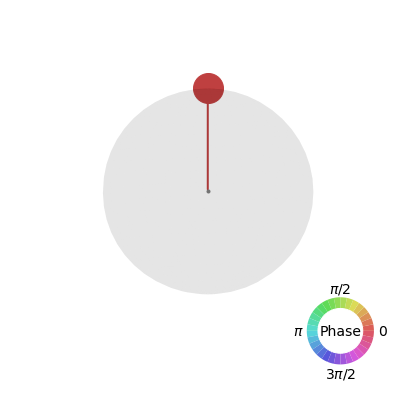

In [38]:
from qiskit.visualization import plot_state_qsphere

# Create a simple circuit with just one qubit
qc1 = QuantumCircuit(1)

# Get the state vector simulator backend
statevector_simulator = Aer.get_backend('statevector_simulator')

# Run the circuit and obtain the state vector of the qubit
result = execute(qc1, statevector_simulator).result()
statevector_results = result.get_statevector(qc1)
plot_state_qsphere(statevector_results)

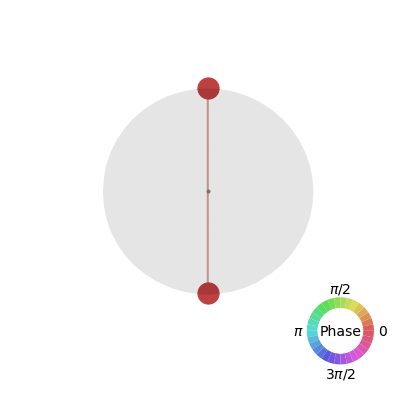

In [39]:
# Apply a Hadamard gate
qc1.h(0)
result = execute(qc1, statevector_simulator).result()
statevector_results = result.get_statevector(qc1)
plot_state_qsphere(statevector_results)

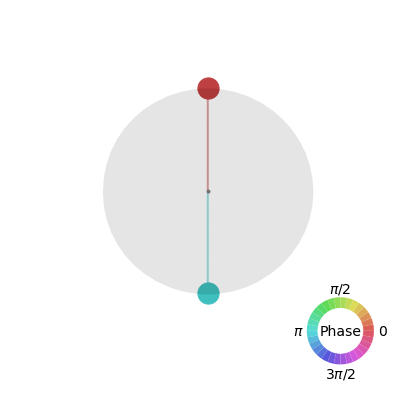

In [40]:
# Pauli Z gate
qc1.z(0)
result = execute(qc1, statevector_simulator).result()
statevector_results = result.get_statevector(qc1)
plot_state_qsphere(statevector_results)

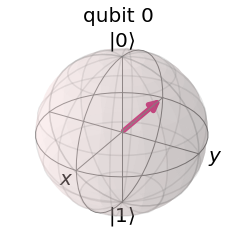

In [41]:
plot_bloch_multivector(statevector_results)

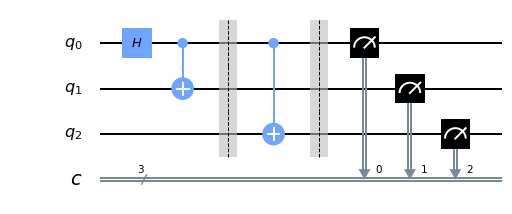

Statevector 1 : [(0.7071067811865476+0j), 0j, 0j, (0.7071067811865475+0j), 0j, 0j, 0j, 0j]
Statevector 2 : [(0.7071067811865476+0j), 0j, 0j, 0j, 0j, 0j, 0j, (0.7071067811865475+0j)]


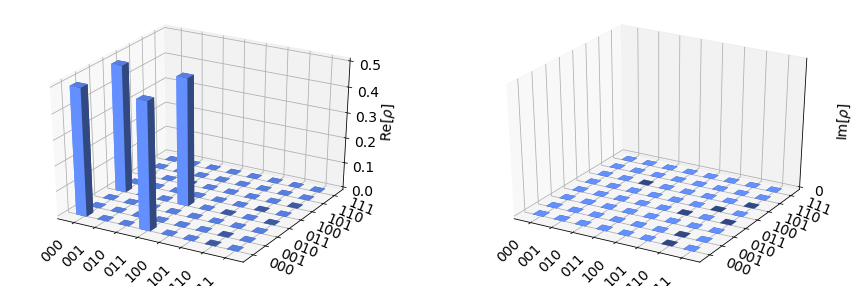

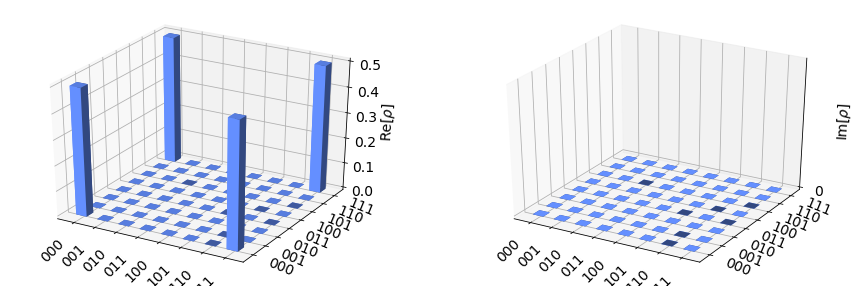

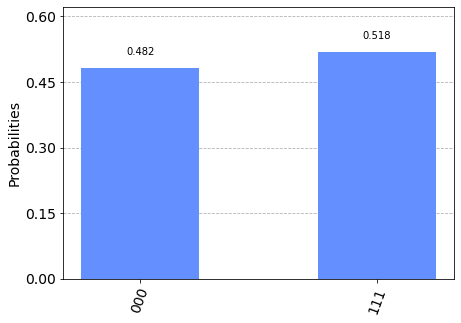

In [42]:
from qiskit.visualization import plot_state_city

# Create the usual gate and take snapshots as we made the changes
qc3 = QuantumCircuit(3,3)
qc3.h(0)
qc3.cx(0,1)
# Take first snapshot and give it a label with type
qc3.snapshot(label='snap1', snapshot_type='statevector')

# Add another CNOT to the circuit
qc3.cx(0,2)
# Take second snapshot and give it a label with type
qc3.snapshot(label='snap2', snapshot_type='statevector')

# Measure and execute the circuit
qc3.measure([0,1,2], [0,1,2])
simulator = Aer.get_backend('qasm_simulator')

# Using matplotlib to render and display the circuit
display(qc3.draw('mpl'))
result = execute(qc3, backend=simulator, shots=1024).result()

# Extract and show the resulting snapshots
snapshots = result.data()['snapshots']

statevector1 = snapshots['statevector']['snap1'][0]
statevector2 = snapshots['statevector']['snap2'][0]
print("Statevector 1 :", statevector1)
print("Statevector 2 :", statevector2)

# Display the results using another visualization tool, state city
display(plot_state_city(statevector1))
display(plot_state_city(statevector2))
plot_histogram(result.get_counts(qc3))

In [43]:
qc3.draw()

┌───┐     ┌────────┐     ┌────────┐┌─┐      
q_0: ┤ H ├──■──┤0       ├──■──┤0       ├┤M├──────
     └───┘┌─┴─┐│        │  │  │        │└╥┘┌─┐   
q_1: ─────┤ X ├┤1 snap1 ├──┼──┤1 snap2 ├─╫─┤M├───
          └───┘│        │┌─┴─┐│        │ ║ └╥┘┌─┐
q_2: ──────────┤2       ├┤ X ├┤2       ├─╫──╫─┤M├
               └────────┘└───┘└────────┘ ║  ║ └╥┘
c_0: ════════════════════════════════════╩══╬══╬═
                                            ║  ║ 
c_1: ═══════════════════════════════════════╩══╬═
                                               ║ 
c_2: ══════════════════════════════════════════╩═

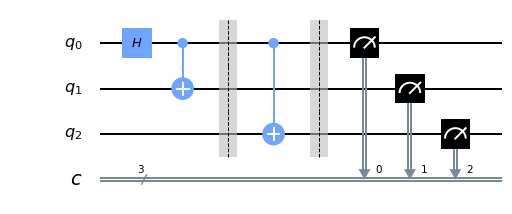

In [44]:
qc3.draw('mpl')
# qc3.draw('latex') if latex module is installed

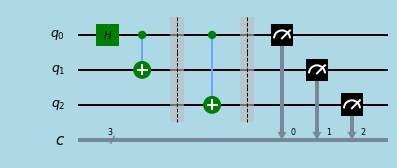

In [45]:
# Define the style to render the circuit and components
style = {'backgroundcolor': 'lightblue', 'gatefacecolor': 'green',
         'gatetextcolor': 'black', 'fontsize': 10}

# Display the matplotlib with the specified style
qc3.draw(output='mpl', style=style)

# End of Program